# Fit Wind Speed to Generalized Extreme Value Distribution 

Extreme wind speed recurrence intervalse are calculated by fitting block maxima (annual maximum wind speed) to standard statistical distributions. The common distribution selected is the General Extreme Value (GEV) which includes three types of distributions including(Wikipedia): 
- Type I, also known as Gumbel, Type I Fisher-Tippett, and Weibull, 
- Type II, also known as Frechet or Weibull Min,
- Type III, also know as Reverse or Inverse Weibull. 

Typically it is understood that Type I and Type III distributions are best fits for wind speed block maxima, and that Type I result are more conservative than Type III because the method does consider "tail effects" (Palutikof). 

Fitting extreme wind speeds to a distribution involves selecting annual block maximuma from a time series of observations. Annual intervals are the most commonly chosen epoch for a GEV best fit. A recommended minimum of 20-years of data is required to develop improved accuracy of longer data sets (Palutikof).

**Generalized Extreme Value Equations**
$$CDF = F(x) = 
  \begin{cases}
    exp[-(1-ky)^\frac{1}{k}] & \quad \text{for} \quad k\ne0\\
    exp[-exp(-y)]            & \quad \text{for} \quad k=0
  \end{cases}
$$

> $k$ = shape factor
>
> $y = \frac{x-\beta}{\alpha}$ 
> - $\beta$ = location parameter (mode of extreme value distribution)  
> - $\alpha$ = scale parameter (dispersion)  

**Distribution Type**

> Type I: $k = 0$  
> Type II: $k < 0$  
> Type III: $k > 0$   

**To Solve for x**

$$CDF = F(x) = 1-\frac{1}{T} \quad \text{where } \quad x =
  \begin{cases}
    \beta+\frac{\alpha}{k}\{1-[-ln(1-\frac{1}{T})]^k\} \quad \text{for } k\ne0\\
    \beta-\alpha*ln(-ln(1-\frac{1}{T})) \quad \text{for } k=0
  \end{cases}
$$

### Type I - Cumulative Distribution Function (CDF) - Graphical

A simple least square regression can be performed graphically using the Type I Gumbel reduce variant as the independent variable and the ranked wind speed as the dependent variable. Usually, the graphical method is used for simplicity and speed. The gumbel reduce variate $\gamma_{Gumbel}$, cumulative distribution function (CDF) $F(x)$, and Return Perid $T$ are given by (El-Shanshoury, Palutikof): 

$$\gamma_{Gumbel} = -ln\{-ln[F(x)]\} \quad \text{Type I GEV}$$  

**Cumulative Distribution Function (CDF) - Empirical Probability of Exceedance**  
> $\text{Typical:} \quad F(x) = \frac{m}{N+1}$  
>
> $\text{Special:} \quad F(x) = \frac{m-0.44}{N+0.12} \quad \text{lower extreme value}$ 
> - m: Rank position high (1) and low (N)
> - N: Number of Annual Maxima  
  
$$\text{Return Period (years)} \quad T = \frac{1}{1-F(x)} \quad \text{therefore } CDF = 1-\frac{1}{T}$$  

## General Extreme Value (scipy.stats)
Scipy.stats is Python based statistical library the contains numerous statistical best-fit methods. The three GEV types are utilized in the following library methods and best-fit parameters are estimated utilizing the Maximum Likelihood Estimate (MLE).

GEV
[scipy.stats.genextreme](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.genextreme.html)

- GEV Type 1 (Gumbel) [scipy.stats.gumbel_r](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gumbel_r.html#scipy.stats.gumbel_r)   
- GEV Type II (Weibull Min) [scipy.stats.weibull_min](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min)
- GEV Type III (Inverse Weibull) [scipy.stats.invweibull](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invweibull.html#scipy.stats.invweibull) 

## References
- El-Shanshoury, Gh I., and A. A. Ramadan. "Estimation of extreme value analysis of wind speed in the north-western coast of Egypt." Arab Journal of Nuclear Science and Applications 45, no. 4 (2012): 265-274. [Link](https://www.researchgate.net/publication/324156508_Estimation_of_Extreme_Value_Analysis_of_Wind_Speed_in_the_North-Western_Coast_of_Egypt)
- Palutikof, J. P., B. B. Brabson, D. H. Lister, and S. T. Adcock. "A review of methods to calculate extreme wind speeds." Meteorological applications 6, no. 2 (1999): 119-132. [Palutikof 1999](https://rmets.onlinelibrary.wiley.com/doi/pdf/10.1017/S1350482799001103)
- Virtanen, Pauli, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski et al. "SciPy 1.0: fundamental algorithms for scientific computing in Python." Nature methods 17, no. 3 (2020): 261-272. [Scipy.Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- Wikipedia General Extreme Value [GEV Wikipedia](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)

### Other References
- [ATC Hazards](https://hazards.atcouncil.org/#/wind?lat=30.2542565&lng=-88.1124155&address=Dauphin%20Island%2C%20AL%2C%20USA) recommends 86 miles per hour as 10-year wind speed.
- [Excel tool](https://www.itl.nist.gov/div898/winds/excel.htm) Excel check for Graphical Gumbel 
- [Github Typhoon Stats](https://github.com/iamjorob/Typhoon_Stats/blob/master/Plot_TC_RP.py) check for Graphical Gumbel.
- [MathWave](http://www.mathwave.com/articles/extreme-value-distributions.html) general background of GEV distributions.


In [14]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from cycler import cycler

import scipy
import scipy.stats as st
import statsmodels as sm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings

# Matplotlib Defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.style.use('ggplot')
default_cycler = (cycler('color', ['b', 'm', 'k', 'y', 'r', 'g']) +
                  cycler('linestyle', ['-', '--', ':', '-.', ':', '-.']))
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)
font = {'family' : 'arial',
        'size'   : 16}
plt.rc('font', **font)

# %%javascript
# MathJax.Hub.Config({
#     TeX: { equationNumbers: { autoNumber: "AMS" } }
# });

# Step 1: Load Data

In [15]:
def pickle_helper_load(file_name, file_path):
    pickle_file = os.path.join(file_path, file_name)
    with open(pickle_file, 'rb') as infile:
        pickle_data = pickle.load(infile)
    return pickle_data

file_path  = r'C:\Users\matt.salmon\Jupyter_notebooks\ADCNR\out'
dict_max_wspd = pickle_helper_load('dpia1_max_wspd.pickle',  file_path)

# Load to DataFrame
df_wind_speed = pd.DataFrame.from_dict(dict_max_wspd, orient='index') #load to dataframe

# Convert m/s to mph
df_wind_speed['wspd_mph'] = pd.to_numeric(df_wind_speed['wspd']) * 2.23694 # get wind speed in miles per hour

# Convert to numpy array (i.e., list for ranking)
np_wind_speed = df_wind_speed.wspd_mph.to_numpy()

# Rank wind speeds
wind_speed = np.sort(np_wind_speed, axis=-1, kind='quicksort')
df_wind_speed

,date,wind_dir,wspd,wspd_mph
dpia1h1987,19870215,161,18.4,41.159696
dpia1h1988,19880809,141,18.8,42.054472
dpia1h1989,19890322,347,15.7,35.119958
dpia1h1990,19900513,159,17,38.027980
dpia1h1991,19910725,10,18.6,41.607084
dpia1h1992,19920205,79,18.2,40.712308
dpia1h1993,19930409,124,24.4,54.581336
dpia1h1994,19941211,360,16.4,36.685816
dpia1h1995,19951004,321,27.1,60.621074
dpia1h1996,19960319,296,20.1,44.962494


# Gumbel Graphical Method - Type I General Extreme Value 
References - El-Shanshoury, Palutikof

In [16]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
class GraphicalGumbelFit():
    '''
    El-Shanshoury, Gh I., and A. A. Ramadan. "Estimation of extreme value analysis of wind speed in the 
    north-western coast of Egypt." Arab Journal of Nuclear Science and Applications 45, no. 4 (2012): 265-274.
    
    Palutikof, J. P., B. B. Brabson, D. H. Lister, and S. T. Adcock. "A review of methods to calculate extreme 
    wind speeds." Meteorological applications 6, no. 2 (1999): 119-132.
    '''
    def __init__(self, ranked_values, case):
        '''ranked_values lowest to highest'''
        self.ranked_values = ranked_values
        self.case = case
        self.cdf = []
        self.y_gumbel_I = []
        self.ret_per = []
        self.rec_int = []
    
    def gumbel_type_I(self):
        N = len(self.ranked_values)
        for rank in range(N):
            m = rank + 1            
            if self.case == 'special':
                Fx = (m-0.44)/(N+0.12) #preferred - gives lower wind speeds than F_x
            elif self.case == 'typical':
                Fx = m / ( N + 1 )
            self.cdf.append(Fx) 
            self.ret_per.append(1/(1 - Fx))
            self.y_gumbel_I.append(-np.log(-np.log(Fx)))
            self.rec_int.append(1-Fx)

# Typical Method Results         
g_typical = GraphicalGumbelFit(wind_speed, 'typical')
g_typical.gumbel_type_I()
gum_graph_var = g_typical.y_gumbel_I
gum_graph_ret_per = g_typical.ret_per
Fx_typical = g_typical.cdf
recur_interval_typical = g_typical.rec_int

# Special Method Results
g_special = GraphicalGumbelFit(wind_speed, 'special')
g_special.gumbel_type_I()
gum_var_special = g_special.y_gumbel_I
ret_ped_special = g_special.ret_per
Fx_special = g_special.cdf
recur_interval_special = g_special.rec_int

## Gumbel Graphical Method - Best Fit Line - Sklearn Linear Regression
The relationship between the Gumbel Variate and Wind Speed can be interpreted as linear.

In [17]:
class PredictFromSklearn():
    def __init__(self, x_value, y_value, coef=None, intercept=None,  name=None):
        self.x_value = x_value
        self.y_value = y_value
        self.name = name
        self.coef = coef
        self.intercept = intercept
        self.y_pred = None
    
    def sk_linear(self):
        x = np.array(self.x_value).reshape(-1,1)
        y = np.array(self.y_value).reshape(-1,1)
        regr = linear_model.LinearRegression() # Create linear regression object
        regr.fit(x, y) # Train / Fit the model using the training sets
        self.y_pred = regr.predict(x) # Make predictions using the testing set
        # Calculate the Best-Fit line coefficients
        print('\nBest Fits for {}'.format(self.name))
        self.coef = regr.coef_[0][0]
        self.intercept = regr.intercept_
        print('Coefficients (Beta - loc): {:.2f}'.format(regr.coef_[0][0]))
        print('Intercept (alpha - scale): %.2f' % regr.intercept_)        
        print('Mean squared error: %.2f' % mean_squared_error(y, self.y_pred)) # The mean squared error
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: %.2f' % r2_score(y, self.y_pred))
        
    def get_return_period(self, wind_speed, h=False):
        slope = self.coef
        intercept = self.intercept
        y_value = slope * wind_speed + intercept
        Fx = 1/np.exp(1/np.exp(y_value)) # Gumbel distribution
        return_T = (1 / (1-Fx))
        if h is True:
            print('Return period: {:.2f} years'.format(float(return_T)))
        return float(return_T)

    def get_wind_speed(self, return_period, h=False):
        slope = self.coef
        intercept = self.intercept
        Fx = 1-(1 / return_period)
        y_gumbel_pred = -np.log(-np.log(Fx))
        wind_speed = (y_gumbel_pred - intercept) / slope
        if h is True:
            print('Wind speed (mph): {ws:.2f}'.format(ws = float(wind_speed)))
        return float(wind_speed)

# Typical CDF
typ_test = PredictFromSklearn(wind_speed, gum_graph_var, name='Typical - Wind Speed v Gumbel')
typ_test.sk_linear()
typ_gum_var_pred = typ_test.y_pred
print('\nTypical Results')
typ_rp = typ_test.get_return_period(65.21, h=True)
typ_ws = typ_test.get_wind_speed(10, h=True)
typ_rec_int_pred = [1/typ_test.get_return_period(wind, h='hold') for wind in wind_speed]

# Special CDF
spe_test = PredictFromSklearn(wind_speed, gum_var_special, name='Typical - Wind Speed v Gumbel')
spe_test.sk_linear()
spe_gum_var_pred = spe_test.y_pred
print('\nSpecial Results')
spe_rp = spe_test.get_return_period(65.21, h=True)
spe_ws = spe_test.get_wind_speed(10, h=True)
spe_rec_int_pred = [1/spe_test.get_return_period(wind, h='hold') for wind in wind_speed]

# Attempt to find Beta and Alpha
typ_attempt = PredictFromSklearn(gum_graph_var, wind_speed, name='Typical - Gumbel v Wind Speed - Beta & Alpha')
typ_attempt.sk_linear()





Best Fits for Typical - Wind Speed v Gumbel
Coefficients (Beta - loc): 0.10
Intercept (alpha - scale): -4.00
Mean squared error: 0.09
Coefficient of determination: 0.92

Typical Results
Return period: 10.00 years
Wind speed (mph): 65.21

Best Fits for Typical - Wind Speed v Gumbel
Coefficients (Beta - loc): 0.10
Intercept (alpha - scale): -4.37
Mean squared error: 0.11
Coefficient of determination: 0.93

Special Results
Return period: 11.80 years
Wind speed (mph): 63.54

Best Fits for Typical - Gumbel v Wind Speed - Beta & Alpha
Coefficients (Beta - loc): 9.65
Intercept (alpha - scale): 42.15
Mean squared error: 9.55
Coefficient of determination: 0.92


### Check Graphical Gumbel with Excel Best Fit Line - See Attachment 2

In [18]:
###########Excel Tool Check #########################################################
excel_typ_slope, excel_typ_inter = 1/9.6473, -42.152/9.6473
excel_spe_slope, excel_spe_inter = 1/8.8859, -42.338/8.8859
excel_special = [(x - 42.338)/8.8859 for x in wind_speed]
excel_typical = [(x -42.152)/9.6473 for x in wind_speed]

print('\nExcel Check')
ex_check_typ = PredictFromSklearn(None, None, excel_typ_slope, excel_typ_inter).get_wind_speed(10, h=True)
ex_check_spe = PredictFromSklearn(None, None, excel_spe_slope, excel_spe_inter).get_wind_speed(10, h=True)


Excel Check
Wind speed (mph): 63.86
Wind speed (mph): 62.33


## Gumbel Graphical Method - Plot Results
For comparisson, the Calculated Points and two best-fit line methods were plotted.

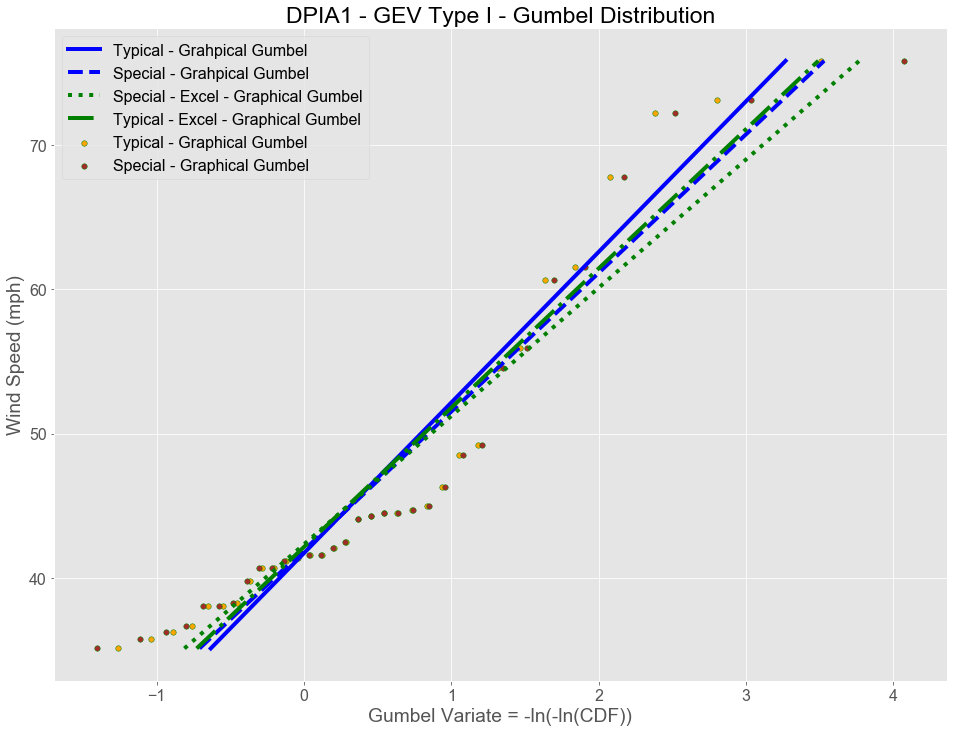

In [19]:
# Plot of Wind Speed and Gumbel Variate
fig, ax = plt.subplots(1)
ax.scatter(gum_graph_var, wind_speed, s=30, facecolors='orange', edgecolors='g', label='Typical - Graphical Gumbel')
ax.scatter(gum_var_special, wind_speed, s=30, facecolors='brown', edgecolors='g', label='Special - Graphical Gumbel')

# Plot Method 1 Results
ax.plot(typ_gum_var_pred, wind_speed, color='blue', label='Typical - Grahpical Gumbel')
ax.plot(spe_gum_var_pred, wind_speed, color='blue', label='Special - Grahpical Gumbel')

# Gaston completed a check to Excel Method (< 5% Error).
# [Excel tool](https://www.itl.nist.gov/div898/winds/excel.htm)
ax.plot(excel_special, wind_speed, color='g', label='Special - Excel - Graphical Gumbel')
ax.plot(excel_typical, wind_speed, color='g', label='Typical - Excel - Graphical Gumbel')


ax.set_title(u'DPIA1 - GEV Type I - Gumbel Distribution')
ax.set_xlabel('Gumbel Variate = -ln(-ln(CDF))')
ax.set_ylabel(u'Wind Speed (mph)')
ax.legend()
plt.show()

# General Extreme Value Distribution Fit - SciPy
Utilize Scipy.Stats to fit extremal data to the GEV method and try it's fit on each individual GEV distribution including Type I, Type II, and Type III. Select best fit distribution and plot results to compare to Graphical Gumbel.

gumbel_r 0.031852530511625954 loc=42.57, scale=7.23
weibull_min 0.06637214432683923 c=0.40, loc=35.12, scale=1.39
invweibull 0.02867931802597767 c=2.57, loc=26.54, scale=14.71
genextreme 0.028679321466113492 c=-0.39, loc=41.25, scale=5.73


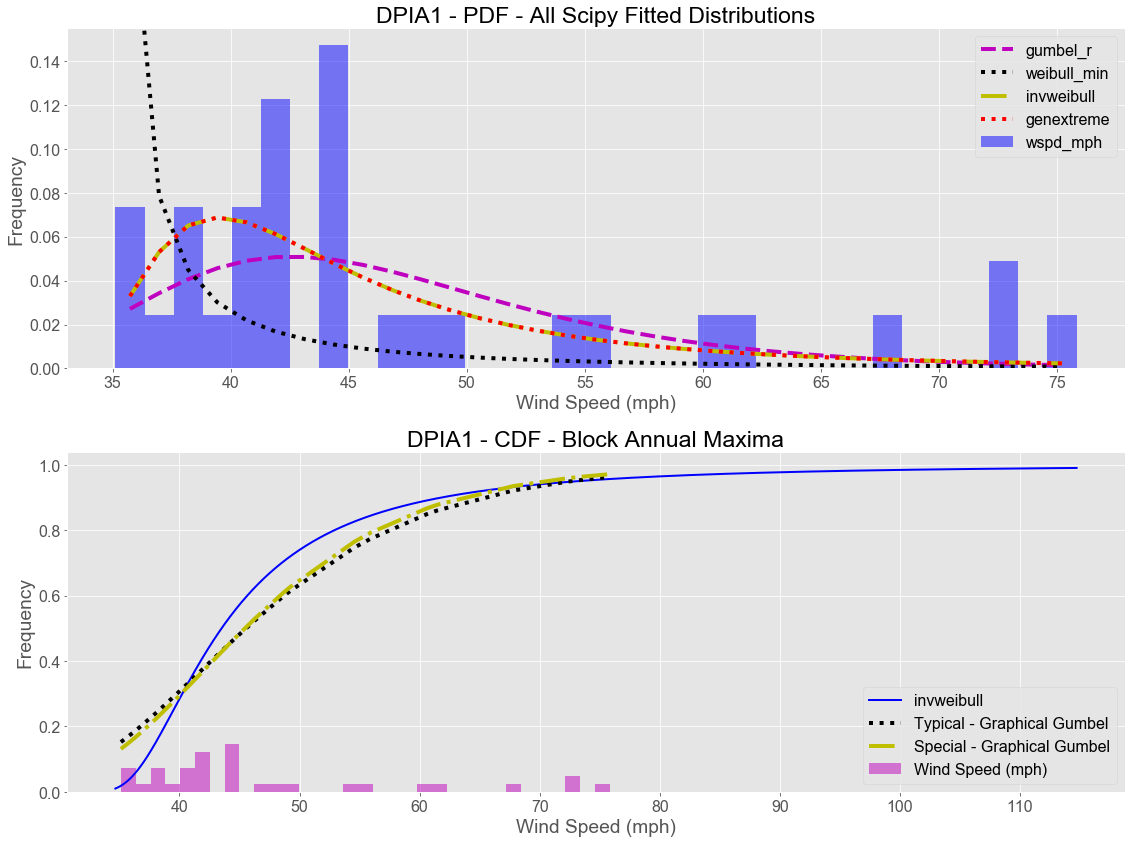

In [20]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [st.gumbel_r, st.weibull_min, st.invweibull, st.genextreme]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                param_names = (distribution.shapes + ', loc, scale').split(', ') if distribution.shapes else ['loc', 'scale']                
                param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, params)])
                print(distribution.name, sse, param_str)

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

def make_cdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.cdf(x, loc=loc, scale=scale, *arg)
    cdf = pd.Series(y, x)
    return cdf


# Load data from statsmodels datasets
fig=plt.figure()

ax0 = plt.subplot(2,1,1)
data = pd.Series(df_wind_speed['wspd_mph'])
no_bins = len(data)
# Plot for comparison
ax0 = data.plot(kind='hist', bins=no_bins, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax0.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, no_bins, ax0)
best_dist = getattr(st, best_fit_name)

# Update plots
ax0.set_ylim(dataYLim)
ax0.set_title(u'DPIA1 - PDF - All Scipy Fitted Distributions')
ax0.set_xlabel(u'Wind Speed (mph)')
ax0.set_ylabel('Frequency')
ax0.legend()

# ax1 = plt.subplot(3,1,2)
# # Make PDF with best params 
# pdf = make_pdf(best_dist, best_fit_params)

# # Display
# ax1 = pdf.plot(lw=2, label='PDF', legend=True)
# data.plot(kind='hist', bins=no_bins, density=True, alpha=0.5, label='Wind Speed (mph)', legend=True, ax=ax1)

# param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
# param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
# dist_str = '{}({})'.format(best_fit_name, param_str)

# ax1.set_title(u'DPIA1 \n Best Fit \n' + dist_str)
# ax1.set_xlabel(u'Wind Speed (mph)')
# ax1.set_ylabel('Frequency')
# ax1.legend()

ax2 = plt.subplot(2,1,2)
# Make CDF with best params 
cdf = make_cdf(best_dist, best_fit_params)
# Display
ax2 = cdf.plot(lw=2, label='{}'.format(best_dist.name), legend=True)
data.plot(kind='hist', bins=no_bins, density=True, alpha=0.5, label='Wind Speed (mph)', legend=True, ax=ax2)
ax2.plot(wind_speed, [1-rec_int for rec_int in typ_rec_int_pred], label='Typical - Graphical Gumbel')
ax2.plot(wind_speed, [1-rec_int for rec_int in spe_rec_int_pred], label='Special - Graphical Gumbel')

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax2.set_title('DPIA1 - CDF - Block Annual Maxima')
ax2.set_xlabel('Wind Speed (mph)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()

plt.savefig("./fig/pdf_cdf_DPIA1.png")
plt.show()

# Results 
Plot all results for each method to compare wind speed and recurrence intervals.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


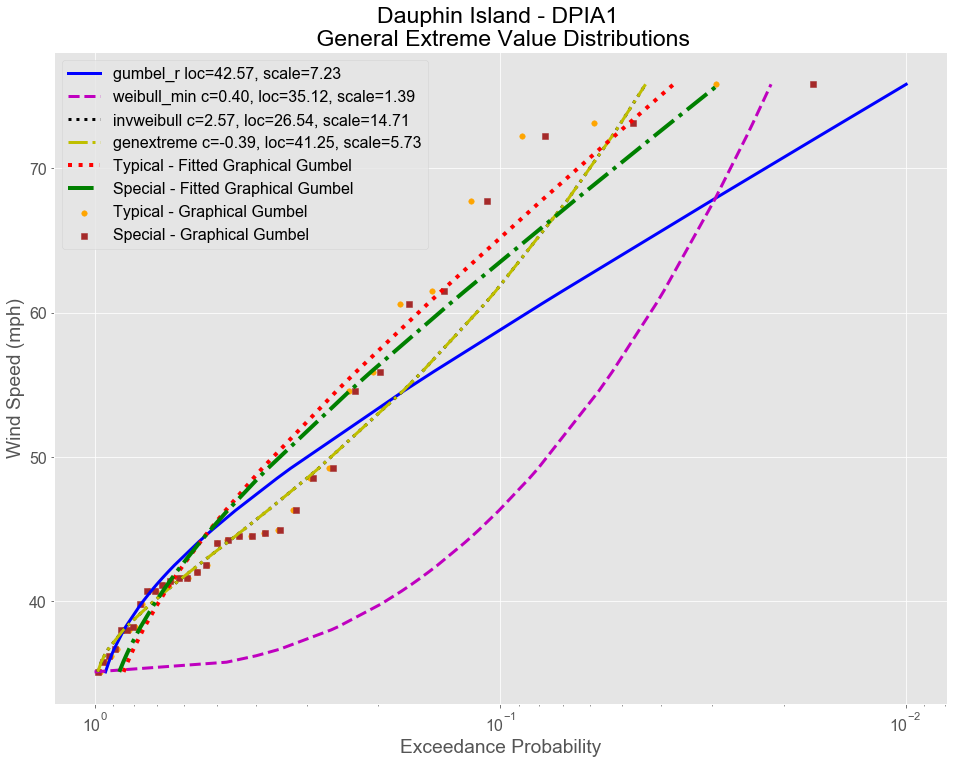

In [21]:
class GevDistributionSingle():
    def __init__(self, data, distribution, params=None, value=None, recurrence=None):
        '''
        data -> nd.array of values
        districution -> scipy.stats distribution type (scipy.stats.genextreme)
        value -> single value used to calculate return period [e.g., 10 years] or recurrence decimal [0.1].
        recurrence -> single recurrence interval to return value.
        '''
        self.data = data
        self.distribution = distribution
        self.params = params
        self.value = value
        self.recurrence = recurrence
        self.shape = None
        self.loc = None
        self.scale = None
        self.cdf = None
        self.pdf = None
        self.param_str = None
    
    def get_best_fit_params(self):
        'Creates best fit CDF and PDF of distribution and defines shape, location, and scale.'
        param_names = (self.distribution.shapes + ', loc, scale').split(', ') if self.distribution.shapes else ['loc', 'scale']
        if not self.params:
            self.params = self.distribution.fit(self.data)
            self.shape = self.params[:-2]
            self.loc = self.params[-2]
            self.scale = self.params[-1]
            self.param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, self.params)])
        else:
            if self.distribution.shapes:
                self.shape = self.params['shape']
            else:
                self.shape = ()
            self.loc = self.params['loc']
            self.scale = self.params['scale']
            self.param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in self.params.items()])
  
    def get_return_period(self, size=10000):
        """
        Calculate return period based on CDF of single value 
        """
        self.get_best_fit_params()
        # Separate parts of parameters
        arg = self.params[:-2]
        loc = self.params[-2]
        scale = self.params[-1]
        x = self.value
        y = self.distribution.cdf(x, loc=loc, scale=scale, *arg) # calculate CDF
        return (1-y)**-1
    
    def get_value(self, size=10000):
        """
        Calculate value based on inverse_CDF of return period. 
        """
        self.get_best_fit_params()
        # Separate parts of parameters
        arg = self.params[:-2]
        loc = self.params[-2]
        scale = self.params[-1]
        y = 1-self.recurrence
        x = self.distribution.ppf(y, loc=loc, scale=scale, *arg)
        return x
        
    def get_best_fit(self):   
        '''Calculate fitted CDF, PDF, and error.'''
        self.cdf = self.distribution.cdf(self.data, loc=self.loc, scale=self.scale, *self.shape)
        self.pdf = self.distribution.cdf(self.data, loc=self.loc, scale=self.scale, *self.shape)
        
    def plot_figure(self):
        '''Call method to plot object'''
        plot_recurrence = [1-pr for pr in self.cdf]
        plot_values = self.data       
        plt.plot(plot_recurrence, 
                 plot_values, 
                 linewidth=3, 
                 label='{} {}'.format(self.distribution.name, self.param_str), 
                )

    def main(self):        
        # Future version Needs IF statement to only catch a Scipy Class type or raise an error. Had to move on.
        self.get_best_fit_params()
        self.get_best_fit()
        
        fig, ax = plt.subplots()
        self.plot_figure()
        
        plt.scatter(recur_interval_typical, wind_speed,  s=30, facecolors='none', edgecolors='g', label='Wind Speed')        
        
        ax.set_title(u'Dauphin Island - DPIA1 \n Gumbel Distributions')
        ax.set_xlabel(u'Exceedance Frequency %')
        ax.set_ylabel('Wind Speed (mph)')
        ax.set_xscale('log')
        ax.legend()
        plt.gca().invert_xaxis()
        
                
class GevDistributionMany(GevDistributionSingle):
    def main(self):
        if isinstance(self.distribution, list):
            fig, ax = plt.subplots()
            plt.scatter(recur_interval_typical, wind_speed,  
                        s=30, color='orange', label='Typical - Graphical Gumbel'
                       )
            plt.scatter(recur_interval_special, wind_speed,  
                        s=30, color='brown', marker='s', label='Special - Graphical Gumbel'
                       )
            for dist in self.distribution:
                self.distribution = dist
                self.get_best_fit_params()
                self.get_best_fit()
                self.plot_figure()
                self.params = None
            
            plt.plot(typ_rec_int_pred, wind_speed, label='Typical - Fitted Graphical Gumbel')
            plt.plot(spe_rec_int_pred, wind_speed, label='Special - Fitted Graphical Gumbel')
            
            ax.set_title(u'Dauphin Island - DPIA1 \n General Extreme Value Distributions')
            ax.set_xlabel(u'Exceedance Probability')
            ax.set_ylabel('Wind Speed (mph)')
            ax.set_xscale('log')
            ax.legend()
            plt.gca().invert_xaxis()
        else:
            raise TypeError('Use GEV_distribution_one for a single scipy.stats module.')


coffee_island = GevDistributionMany(wind_speed, 
                                    [st.gumbel_r, st.weibull_min, st.invweibull, st.genextreme]
                                   ).main()
# plt.savefig("./fig/windspeed_exceedance_prob_DPIA1.png")
plt.show()
############### NOT NEEDED FIGURES BUT HOLDING FOR NEEDED QA/QC###########################
# GevDistributionSingle(wind_speed, st.invweibull).main()
# GevDistributionSingle(wind_speed, st.gumbel_r).main()
# GevDistributionSingle(wind_speed, st.gumbel_r, params={'loc': 9.65, 'scale': 42.15}).main()
# gumbel_r = GEV_distribution(wind_speed, st.gumbel_r).main()

## Table of Results for Wind Speed and Recurrecue Year

In [22]:
print('Title: Wind Speed (mph)')
columns = ['Years', 'Typical Gumbel Graph', 'Special Gumbel Graph', 'Gumbel - Type I',
           'Weibull Min - Type II', 'Inverse Weibull - Type III', 'GEV']


years = [2, 5, 10, 25, 50]
def find_and_format(dist, years, decimals):
    find = [GevDistributionSingle(data, dist, recurrence=1/year).get_value() for year in years]
    format_list = ['{:.2f}'.format(item) for item in find]
    return format_list

def find_and_format_gum_graph(gum, years, decimals):
    find = [gum.get_wind_speed(year, h=False) for year in years]
    format_list = ['{:.2f}'.format(item) for item in find]
    return format_list
    
typ_gumbel = find_and_format_gum_graph(typ_test, years, 2)
spe_gumbel = find_and_format_gum_graph(spe_test, years, 2)
gumbel = find_and_format(st.gumbel_r, years, 2)
weibull_min = find_and_format(st.weibull_min, years, 2)
inv_weib = find_and_format(st.invweibull, years, 2)
gev = find_and_format(st.genextreme, years, 2)
df_wind_returns=pd.DataFrame(list(zip(years, typ_gumbel, spe_gumbel, gumbel, weibull_min, inv_weib, gev)), columns = columns)
# df_wind_returns.to_csv('./out/wind_speed_fit.csv')
df_wind_returns

Title: Wind Speed (mph)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


,Years,Typical Gumbel Graph,Special Gumbel Graph,Gumbel - Type I,Weibull Min - Type II,Inverse Weibull - Type III,GEV
0,2,45.55,45.45,45.22,35.67,43.51,43.51
1,5,57.38,56.34,53.41,39.70,52.92,52.92
2,10,65.21,63.54,58.83,46.38,61.87,61.87
3,25,75.10,72.65,65.68,61.23,77.63,77.63
4,50,82.44,79.40,70.76,77.74,93.72,93.72


In [23]:
# Test method to define return wind speed and period for Scipy Calcualtions.
def retper(wind_speed):
    print('Return Periods (years) for {} mph'.format(wind_speed))
    print('Gumbel_r - Type I: ', GevDistributionSingle(data, st.gumbel_r, value=wind_speed).get_return_period())
    print('Gumbel_r - Type I: ', GevDistributionSingle(data, st.gumbel_r, recurrence=1/23.45323).get_value())
    print('Gen Extreme Type II & Type III (Best fit): ', GevDistributionSingle(data, st.genextreme, value=wind_speed).get_return_period())
    print('Weibull: ', GevDistributionSingle(data, st.weibull_min, value=wind_speed).get_return_period())
    print('invweibull: ', GevDistributionSingle(data, st.invweibull, value=wind_speed).get_return_period())
    # Gumbel_r - Type I: 65.21 mph =  23.453239679609343
    # Gen Extreme Type II & Type III (Best fit): 65.21 mph = 12.4818042641699
    # Weibull: 65.21 mph = 30.134932904762763
    # invweibull: 65.21 mph = 12.4818042641699
retper(65.21)
retper(52)

Return Periods (years) for 65.21 mph
Gumbel_r - Type I:  23.453239679609343
Gumbel_r - Type I:  65.20999695210291
Gen Extreme Type II & Type III (Best fit):  12.481797121334386
Weibull:  30.134932904762763
invweibull:  12.4818042641699
Return Periods (years) for 52 mph
Gumbel_r - Type I:  4.210163470825244
Gumbel_r - Type I:  65.20999695210291
Gen Extreme Type II & Type III (Best fit):  4.612071314012496
Weibull:  14.963019017706653
invweibull:  4.61204409369193


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
